In [ ]:
# TO BE COMPLETED
https://colab.research.google.com/drive/1a5WYhnDAP3p_67ACbPbHZGYU58lz7P7R?usp=sharing

# Part A. Data Collection [5pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this assignment is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This assignment focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required to assess our models by ourselves. You are required to collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# **Data Loading and Splitting**

In [8]:
# TO BE COMPLETED
!pip install split-folders

In [1]:
import os
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim

In [3]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip /content/A2_Hand_Gesture_Dataset_revised.zip

Archive:  /content/A2_Hand_Gesture_Dataset_revised.zip
   creating: Lab_3b_Gesture_Dataset Revised/
  inflating: __MACOSX/._Lab_3b_Gesture_Dataset Revised  
  inflating: Lab_3b_Gesture_Dataset Revised/.DS_Store  
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._.DS_Store  
   creating: Lab_3b_Gesture_Dataset Revised/I/
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._I  
   creating: Lab_3b_Gesture_Dataset Revised/G/
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._G  
   creating: Lab_3b_Gesture_Dataset Revised/A/
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._A  
   creating: Lab_3b_Gesture_Dataset Revised/F/
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._F  
   creating: Lab_3b_Gesture_Dataset Revised/H/
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._H  
   creating: Lab_3b_Gesture_Dataset Revised/C/
  inflating: __MACOSX/Lab_3b_Gesture_Dataset Revised/._C  
   creating: Lab_3b_Gesture_Dataset Revised/D/
  inflating: __MACOSX/Lab_3b_Gesture_

In [ ]:
import splitfolders

splitfolders.ratio("A2_Hand_Gesture_Dataset_revised\Lab_3b_Gesture_Dataset Revised", output="", seed=1, ratio=(.8, .1, .1), group_prefix=None)

In [10]:
# define training and test data directories
data_dir = 'drive/MyDrive/Colab Notebooks/Gesture Data/'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

In [11]:
train_dir

'drive/MyDrive/Colab Notebooks/Gesture Data/train/'

In [12]:
# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

In [13]:
train_data

Dataset ImageFolder
    Number of datapoints: 1942
    Root location: drive/MyDrive/Colab Notebooks/Gesture Data/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
val_data

Dataset ImageFolder
    Number of datapoints: 240
    Root location: drive/MyDrive/Colab Notebooks/Gesture Data/val/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 250
    Root location: drive/MyDrive/Colab Notebooks/Gesture Data/test/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

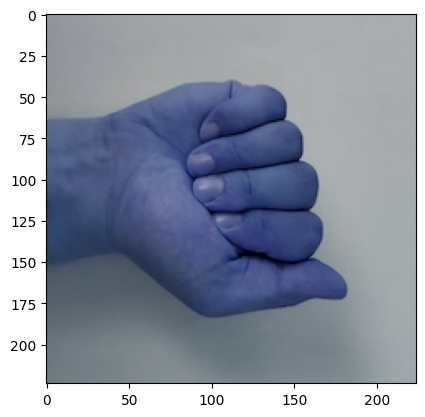

In [14]:
# try to see if it works
import cv2
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Gesture Data/test/A/11_A_3.jpg')
np.array(img, dtype = 'float32')
plt.imshow(img)

# **Finetuning CNN Model**

In [15]:
# TO BE COMPLETED

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        # RGB value so in channel = 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # Double the out channel
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)

        # fully connected
        self.fc1 = nn.Linear(16 * 28 * 28, 256)
        # 9 output categories
        self.fc2 = nn.Linear(256, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [8,56,56]
        x = self.pool(F.relu(self.conv2(x)))  # [16,28,28]

        x = x.view(-1, 16 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [16]:
# TO BE COMPLETED
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                              batch_size,
                              learning_rate,
                              epoch)
    return path


In [17]:
def get_accuracy(model, batch_size = 32, train=False):
    if train:
        data = train_data
    else:
        data = val_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size, num_workers = 0):

        #############################################
        #To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [18]:
def train(model, data, batch_size=64, learning_rate = 0.01, num_epochs=10):
    train_loader = torch.utils.data.DataLoader(data, shuffle=True, batch_size=batch_size, num_workers = 0)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

          #############################################
          #To Enable GPU Usage
          if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
          #############################################

          out = model(imgs)             # forward pass

          loss = criterion(out, labels) # compute the total loss
          loss.backward()               # backward pass (compute parameter updates)
          optimizer.step()              # make the updates for each parameter
          optimizer.zero_grad()         # a clean up step for PyTorch

          # save the current training information
          iters.append(n)
          losses.append(float(loss)/batch_size)             # compute *average* loss
          train_acc.append(get_accuracy(model, batch_size = batch_size, train=True)) # compute training accuracy
          val_acc.append(get_accuracy(model, batch_size = batch_size, train=False))  # compute validation accuracy
          n += 1

        print(f"Epoch {epoch + 1}/{num_epochs} "
            f"| Iteration: {n} "
            f"| Train Loss: {losses[-1]:.4f} "
            f"| Train Accuracy: {train_acc[-1]:.4f} "
            f"| Val Accuracy: {val_acc[-1]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
model = CNN()

In [19]:
torch.cuda.is_available()

True

CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 16 | Train Loss: 0.0170 | Train Accuracy: 0.2327 | Val Accuracy: 0.2208
Epoch 2/20 | Iteration: 32 | Train Loss: 0.0165 | Train Accuracy: 0.1329 | Val Accuracy: 0.1500
Epoch 3/20 | Iteration: 48 | Train Loss: 0.0157 | Train Accuracy: 0.2636 | Val Accuracy: 0.2917
Epoch 4/20 | Iteration: 64 | Train Loss: 0.0134 | Train Accuracy: 0.3599 | Val Accuracy: 0.3417
Epoch 5/20 | Iteration: 80 | Train Loss: 0.0092 | Train Accuracy: 0.3605 | Val Accuracy: 0.3583
Epoch 6/20 | Iteration: 96 | Train Loss: 0.0116 | Train Accuracy: 0.5288 | Val Accuracy: 0.4875
Epoch 7/20 | Iteration: 112 | Train Loss: 0.0089 | Train Accuracy: 0.5597 | Val Accuracy: 0.5458
Epoch 8/20 | Iteration: 128 | Train Loss: 0.0076 | Train Accuracy: 0.6370 | Val Accuracy: 0.6208
Epoch 9/20 | Iteration: 144 | Train Loss: 0.0123 | Train Accuracy: 0.6704 | Val Accuracy: 0.6708
Epoch 10/20 | Iteration: 160 | Train Loss: 0.0063 | Train Accuracy: 0.6509 | Val Accuracy: 0.

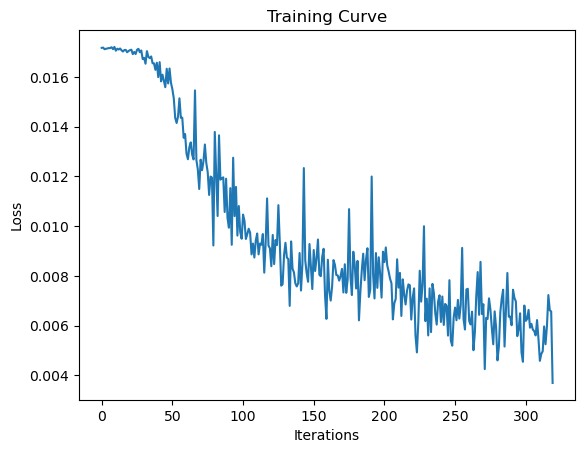

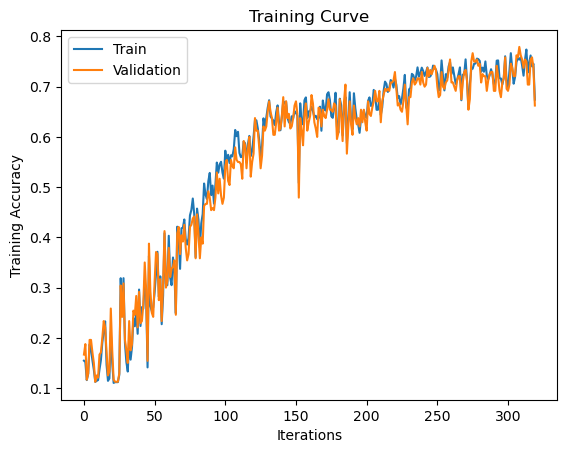

Final Training Accuracy: 0.6740473738414006
Final Validation Accuracy: 0.6625


In [ ]:
if torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_data, batch_size=128, num_epochs=20, learning_rate=0.01)

## **batch_size=128, num_epochs=20, learning_rate=0.01**

In [ ]:
'''
Previously: batch_size=128, num_epochs=20, learning_rate=0.01

Result:
Epoch 19/20 | Iteration: 304 | Train Loss: 0.0059 | Train Accuracy: 0.7369 | Val Accuracy: 0.7375
Epoch 20/20 | Iteration: 320 | Train Loss: 0.0037 | Train Accuracy: 0.6740 | Val Accuracy: 0.6625
'''

In [ ]:
'''
For better trending vision, I set the epoch to 20 for all
following models.
'''

## **batch_size=64, num_epochs=20, learning_rate=0.01**

CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 31 | Train Loss: 0.0343 | Train Accuracy: 0.1128 | Val Accuracy: 0.1125
Epoch 2/20 | Iteration: 62 | Train Loss: 0.0339 | Train Accuracy: 0.1128 | Val Accuracy: 0.1125
Epoch 3/20 | Iteration: 93 | Train Loss: 0.0293 | Train Accuracy: 0.1668 | Val Accuracy: 0.1750
Epoch 4/20 | Iteration: 124 | Train Loss: 0.0216 | Train Accuracy: 0.3986 | Val Accuracy: 0.3917
Epoch 5/20 | Iteration: 155 | Train Loss: 0.0219 | Train Accuracy: 0.5232 | Val Accuracy: 0.5042
Epoch 6/20 | Iteration: 186 | Train Loss: 0.0186 | Train Accuracy: 0.5742 | Val Accuracy: 0.5750
Epoch 7/20 | Iteration: 217 | Train Loss: 0.0169 | Train Accuracy: 0.6462 | Val Accuracy: 0.6625
Epoch 8/20 | Iteration: 248 | Train Loss: 0.0103 | Train Accuracy: 0.6421 | Val Accuracy: 0.6708
Epoch 9/20 | Iteration: 279 | Train Loss: 0.0109 | Train Accuracy: 0.6941 | Val Accuracy: 0.6917
Epoch 10/20 | Iteration: 310 | Train Loss: 0.0114 | Train Accuracy: 0.7204 | Val Accuracy:

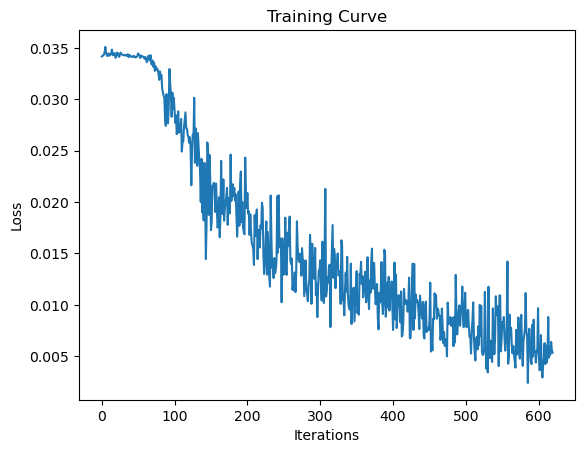

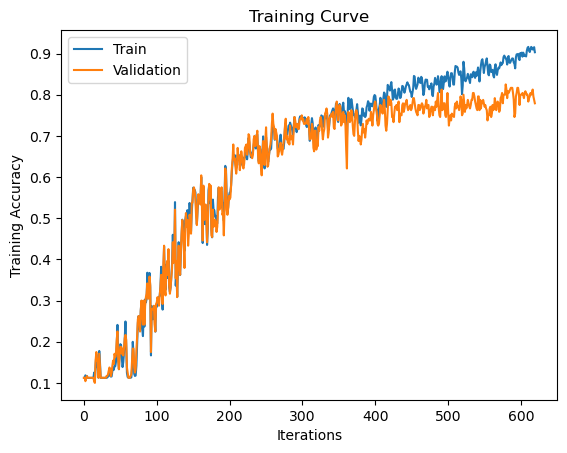

Final Training Accuracy: 0.9031925849639547
Final Validation Accuracy: 0.7791666666666667


In [ ]:
model = CNN()

if torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_data, batch_size=64, num_epochs=20, learning_rate=0.01)

## **batch_size=256, num_epochs=20, learning_rate=0.01**

CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 8 | Train Loss: 0.0086 | Train Accuracy: 0.1262 | Val Accuracy: 0.1208
Epoch 2/20 | Iteration: 16 | Train Loss: 0.0086 | Train Accuracy: 0.2029 | Val Accuracy: 0.2208
Epoch 3/20 | Iteration: 24 | Train Loss: 0.0086 | Train Accuracy: 0.1982 | Val Accuracy: 0.1958
Epoch 4/20 | Iteration: 32 | Train Loss: 0.0085 | Train Accuracy: 0.3280 | Val Accuracy: 0.3333
Epoch 5/20 | Iteration: 40 | Train Loss: 0.0085 | Train Accuracy: 0.2353 | Val Accuracy: 0.2667
Epoch 6/20 | Iteration: 48 | Train Loss: 0.0082 | Train Accuracy: 0.4197 | Val Accuracy: 0.4083
Epoch 7/20 | Iteration: 56 | Train Loss: 0.0075 | Train Accuracy: 0.3687 | Val Accuracy: 0.3750
Epoch 8/20 | Iteration: 64 | Train Loss: 0.0063 | Train Accuracy: 0.2425 | Val Accuracy: 0.2500
Epoch 9/20 | Iteration: 72 | Train Loss: 0.0062 | Train Accuracy: 0.4300 | Val Accuracy: 0.4417
Epoch 10/20 | Iteration: 80 | Train Loss: 0.0052 | Train Accuracy: 0.5685 | Val Accuracy: 0.5667


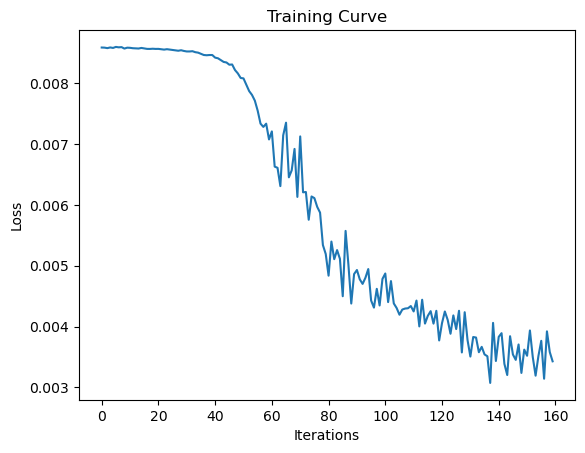

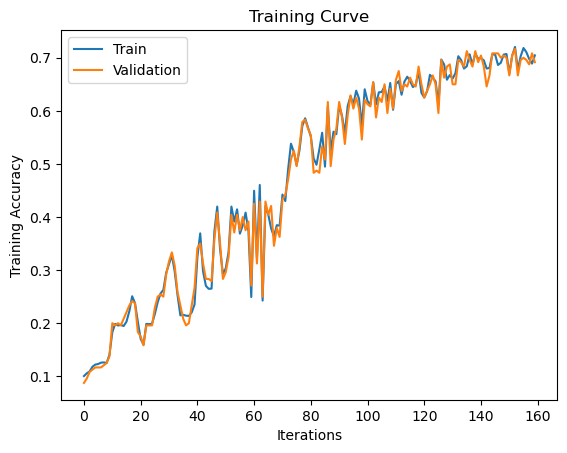

Final Training Accuracy: 0.7044284243048403
Final Validation Accuracy: 0.6916666666666667


In [ ]:
model = CNN()

if torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_data, batch_size=256, num_epochs=20, learning_rate=0.01)

## **batch_size=128, num_epochs=20, learning_rate=0.02**

CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 16 | Train Loss: 0.0171 | Train Accuracy: 0.1493 | Val Accuracy: 0.1708
Epoch 2/20 | Iteration: 32 | Train Loss: 0.0159 | Train Accuracy: 0.1941 | Val Accuracy: 0.2000
Epoch 3/20 | Iteration: 48 | Train Loss: 0.0107 | Train Accuracy: 0.4089 | Val Accuracy: 0.4042
Epoch 4/20 | Iteration: 64 | Train Loss: 0.0124 | Train Accuracy: 0.4053 | Val Accuracy: 0.4125
Epoch 5/20 | Iteration: 80 | Train Loss: 0.0108 | Train Accuracy: 0.5366 | Val Accuracy: 0.5333
Epoch 6/20 | Iteration: 96 | Train Loss: 0.0081 | Train Accuracy: 0.6215 | Val Accuracy: 0.6583
Epoch 7/20 | Iteration: 112 | Train Loss: 0.0130 | Train Accuracy: 0.5649 | Val Accuracy: 0.5542
Epoch 8/20 | Iteration: 128 | Train Loss: 0.0092 | Train Accuracy: 0.6612 | Val Accuracy: 0.6542
Epoch 9/20 | Iteration: 144 | Train Loss: 0.0084 | Train Accuracy: 0.6406 | Val Accuracy: 0.6375
Epoch 10/20 | Iteration: 160 | Train Loss: 0.0092 | Train Accuracy: 0.6916 | Val Accuracy: 0.

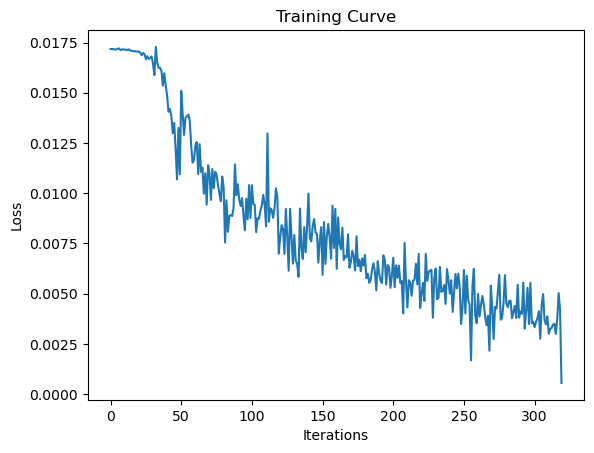

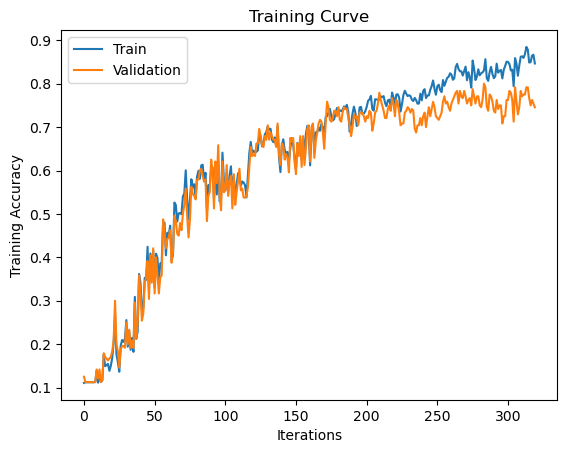

Final Training Accuracy: 0.8465499485066942
Final Validation Accuracy: 0.7458333333333333


In [ ]:
model = CNN()

if torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_data, batch_size=128, num_epochs=20, learning_rate=0.02)

## **New Model with larger kernel size**

In [ ]:
# TO BE COMPLETED

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.name = "CNN2"
        # RGB value so in channel = 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=6, stride=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # Double the out channel
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)

        # fully connected
        self.fc1 = nn.Linear(16 * 27 * 27, 256)
        # 9 output categories
        self.fc2 = nn.Linear(256, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [8,55,55]
        x = self.pool(F.relu(self.conv2(x)))  # [16,27,27]

        x = x.view(-1, 16 * 27 * 27)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 16 | Train Loss: 0.0171 | Train Accuracy: 0.1622 | Val Accuracy: 0.1833
Epoch 2/20 | Iteration: 32 | Train Loss: 0.0171 | Train Accuracy: 0.1313 | Val Accuracy: 0.1375
Epoch 3/20 | Iteration: 48 | Train Loss: 0.0171 | Train Accuracy: 0.1195 | Val Accuracy: 0.1250
Epoch 4/20 | Iteration: 64 | Train Loss: 0.0170 | Train Accuracy: 0.3486 | Val Accuracy: 0.3250
Epoch 5/20 | Iteration: 80 | Train Loss: 0.0154 | Train Accuracy: 0.2353 | Val Accuracy: 0.2542
Epoch 6/20 | Iteration: 96 | Train Loss: 0.0114 | Train Accuracy: 0.3100 | Val Accuracy: 0.3000
Epoch 7/20 | Iteration: 112 | Train Loss: 0.0083 | Train Accuracy: 0.5844 | Val Accuracy: 0.5375
Epoch 8/20 | Iteration: 128 | Train Loss: 0.0067 | Train Accuracy: 0.6179 | Val Accuracy: 0.6125
Epoch 9/20 | Iteration: 144 | Train Loss: 0.0062 | Train Accuracy: 0.6704 | Val Accuracy: 0.6750
Epoch 10/20 | Iteration: 160 | Train Loss: 0.0071 | Train Accuracy: 0.6637 | Val Accuracy: 0.

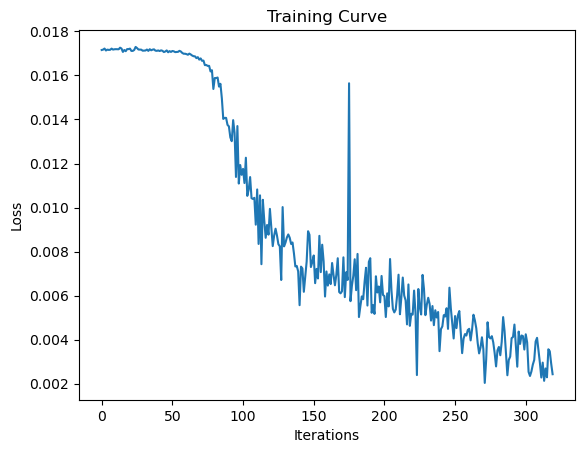

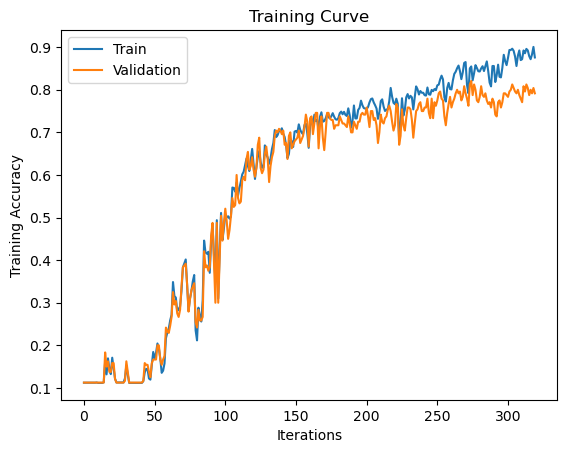

Final Training Accuracy: 0.8759011328527292
Final Validation Accuracy: 0.7916666666666666


In [ ]:
# TO BE COMPLETED
model2 = CNN2()

if torch.cuda.is_available():
  model2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model2, train_data, batch_size=128, num_epochs=20, learning_rate=0.01)




CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 31 | Train Loss: 0.0340 | Train Accuracy: 0.1473 | Val Accuracy: 0.1500
Epoch 2/20 | Iteration: 62 | Train Loss: 0.0341 | Train Accuracy: 0.1123 | Val Accuracy: 0.1125
Epoch 3/20 | Iteration: 93 | Train Loss: 0.0331 | Train Accuracy: 0.1967 | Val Accuracy: 0.2042
Epoch 4/20 | Iteration: 124 | Train Loss: 0.0241 | Train Accuracy: 0.4732 | Val Accuracy: 0.4667
Epoch 5/20 | Iteration: 155 | Train Loss: 0.0183 | Train Accuracy: 0.5000 | Val Accuracy: 0.5125
Epoch 6/20 | Iteration: 186 | Train Loss: 0.0213 | Train Accuracy: 0.4567 | Val Accuracy: 0.4875
Epoch 7/20 | Iteration: 217 | Train Loss: 0.0184 | Train Accuracy: 0.4629 | Val Accuracy: 0.4417
Epoch 8/20 | Iteration: 248 | Train Loss: 0.0103 | Train Accuracy: 0.6164 | Val Accuracy: 0.6208
Epoch 9/20 | Iteration: 279 | Train Loss: 0.0128 | Train Accuracy: 0.6576 | Val Accuracy: 0.6583
Epoch 10/20 | Iteration: 310 | Train Loss: 0.0096 | Train Accuracy: 0.7266 | Val Accuracy:

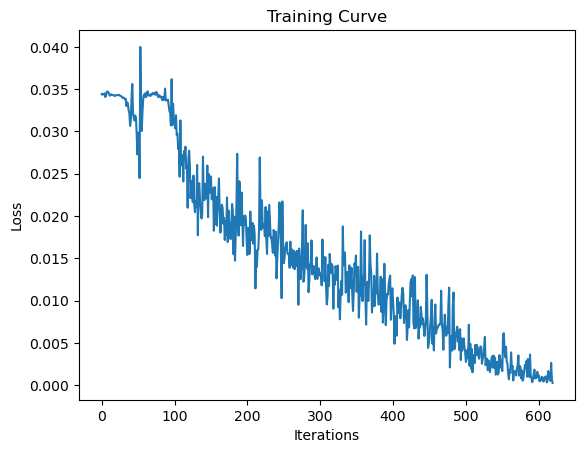

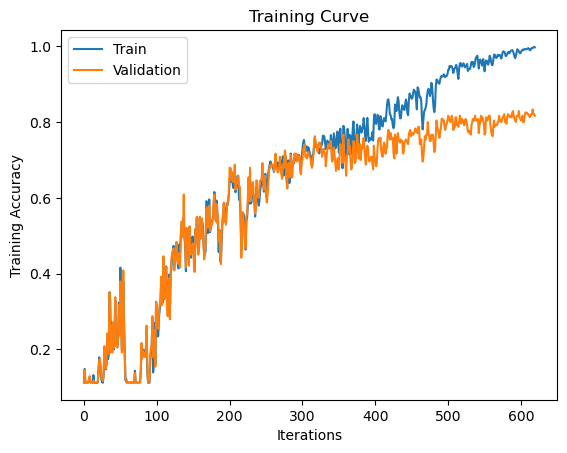

Final Training Accuracy: 0.9974253347064882
Final Validation Accuracy: 0.8166666666666667


In [ ]:
# TO BE COMPLETED
model2 = CNN2()

if torch.cuda.is_available():
  model2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model2, train_data, batch_size=64, num_epochs=20, learning_rate=0.02)


In [ ]:
model = CNN2()
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.02, epoch=19)
state = torch.load(model_path)
model.load_state_dict(state)

C:\Users\huair\AppData\Local\Temp\ipykernel_32644\2838960705.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


<All keys matched successfully>

In [ ]:
# TO BE COMPLETED
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

correct = 0
total = 0
all_preds = []
all_labels = []
for imgs, labels in torch.utils.data.DataLoader(test_data, batch_size=64, num_workers = 0):

    #############################################
    #To Enable GPU Usage
    if torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
    #############################################

    output = model(imgs)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
    all_preds.extend(pred.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
print("Test accuracy:",correct / total)



Test accuracy: 0.76


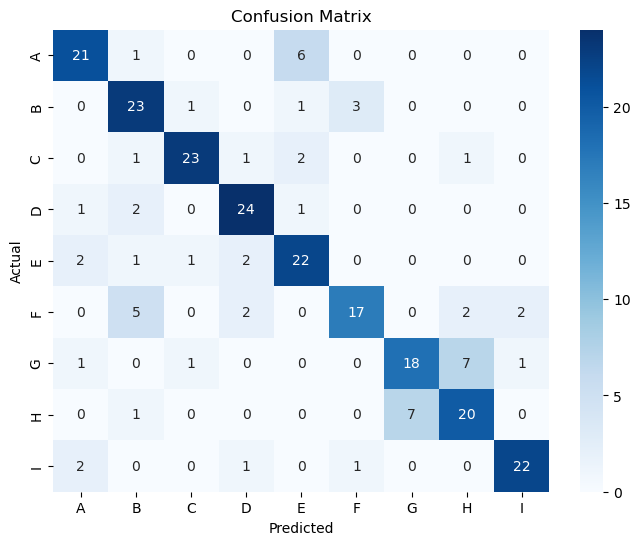

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

class_names = ['A','B','C','D','E','F','G','H','I']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Convex Optimization CNN Model**

In [103]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    correct = 0
    total = 0
    for reviews, labels in data:

        #############################################
        #To Enable GPU Usage
        if torch.cuda.is_available():
          reviews = reviews.cuda()
          labels = labels.cuda()
        #############################################

        output = model(reviews)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += reviews.shape[0]
    return correct / total

In [104]:
class SparseCodingLayer(nn.Module):
    def __init__(self, input_dim, dict_size=128, output_dim=256):
        super().__init__()
        self.encoder = nn.Linear(input_dim, dict_size)  # Learnable encoder
        self.decoder = nn.Linear(dict_size, output_dim)  # Learnable decoder
        self.threshold = nn.Parameter(torch.tensor(0.1))  # Trainable threshold

    def forward(self, x):
        x_proj = self.encoder(x)
        # Soft thresholding (differentiable)
        x_sparse = torch.sigmoid(10*(x_proj - self.threshold)) * x_proj
        return self.decoder(x_sparse)

In [105]:
class CNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = "CNN3"
        self.conv1 = nn.Conv2d(3,8,kernel_size=6,stride=2,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,kernel_size=3,stride=1,padding=1)
        self.sparse_layer = SparseCodingLayer(16*27*27, dict_size=128, output_dim=256)
        self.fc1 = nn.Linear(256, 128)  # Reduced FC layer size
        self.fc2 = nn.Linear(128,9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [B,8,55,55]
        x = self.pool(F.relu(self.conv2(x)))  # [B,16,27,27]

        x = x.view(-1, 16*27*27)  # [B,11664]
        x = self.sparse_layer(x)  # [B,300]

        x = F.relu(self.fc1(x))  # [B,256]
        x = self.fc2(x)  # [B,9]
        return x

In [106]:
def total_variation_loss(features):
    """ TV loss applied to LAST CONV LAYER OUTPUT """
    diff_h = torch.abs(features[:, :, 1:, :] - features[:, :, :-1, :])
    diff_w = torch.abs(features[:, :, :, 1:] - features[:, :, :, :-1])
    return torch.mean(diff_h) + torch.mean(diff_w)

In [107]:
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=64, num_workers=2)
valid_loader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=64, num_workers=2)

In [108]:
def train_tv(model, train_loader, valid_loader, batch_size=64, learning_rate=0.01, num_epochs=10, tv_weight=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # PRESERVE ORIGINAL TRACKING VARIABLES
    iters, losses, train_acc, val_acc = [], [], [], []
    epochs = []
    n = 0  # iteration counter

    for epoch in range(num_epochs):
        for imgs, labels in train_loader:
            if torch.cuda.is_available():
                imgs, labels = imgs.cuda(), labels.cuda()

            # Forward pass with TV on conv2 features
            conv2_out = model.conv2(model.pool(F.relu(model.conv1(imgs))))
            conv2_out = model.pool(F.relu(conv2_out))
            out = model(imgs)

            # Loss calculation
            loss = criterion(out, labels)
            tv_loss = total_variation_loss(conv2_out)
            total_loss = loss + tv_weight * tv_loss

            # Backward pass
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            # PRESERVE ORIGINAL LOGGING
            iters.append(n)
            losses.append(float(total_loss)/batch_size)

            n += 1
        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy
        val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy

        # PRESERVE ORIGINAL PRINTING FORMAT
        print(f"Epoch {epoch+1}/{num_epochs} | Iteration: {n} | Train Loss: {losses[-1]:.4f} "
              f"| Train Accuracy: {train_acc[-1]:.4f} | Val Accuracy: {val_acc[-1]:.4f}")

        # PRESERVE ORIGINAL MODEL SAVING
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    # plotting
    plt.title("Training Loss")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 31 | Train Loss: 0.0342 | Train Accuracy: 0.1123 | Val Accuracy: 0.1125
Epoch 2/20 | Iteration: 62 | Train Loss: 0.0242 | Train Accuracy: 0.3805 | Val Accuracy: 0.3875
Epoch 3/20 | Iteration: 93 | Train Loss: 0.0183 | Train Accuracy: 0.5870 | Val Accuracy: 0.5667
Epoch 4/20 | Iteration: 124 | Train Loss: 0.0131 | Train Accuracy: 0.6627 | Val Accuracy: 0.6417
Epoch 5/20 | Iteration: 155 | Train Loss: 0.0149 | Train Accuracy: 0.7199 | Val Accuracy: 0.6958
Epoch 6/20 | Iteration: 186 | Train Loss: 0.0083 | Train Accuracy: 0.7570 | Val Accuracy: 0.7167
Epoch 7/20 | Iteration: 217 | Train Loss: 0.0105 | Train Accuracy: 0.7781 | Val Accuracy: 0.7292
Epoch 8/20 | Iteration: 248 | Train Loss: 0.0103 | Train Accuracy: 0.8012 | Val Accuracy: 0.7750
Epoch 9/20 | Iteration: 279 | Train Loss: 0.0108 | Train Accuracy: 0.8347 | Val Accuracy: 0.7792
Epoch 10/20 | Iteration: 310 | Train Loss: 0.0010 | Train Accuracy: 0.8744 | Val Accuracy:

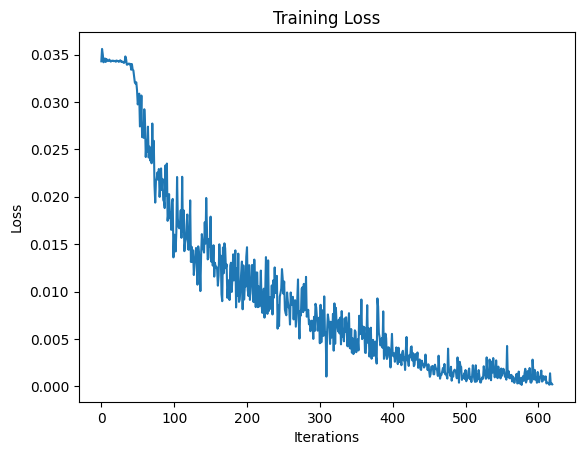

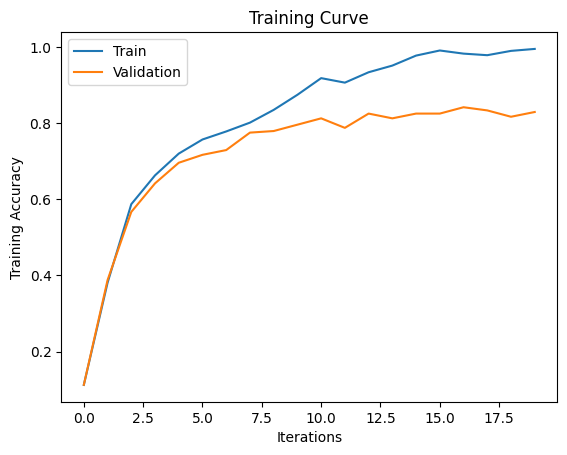

Final Training Accuracy: 0.9948506694129763
Final Validation Accuracy: 0.8291666666666667


In [110]:
# TO BE COMPLETED
model3 = CNN3()

if torch.cuda.is_available():
  model3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_tv(model3, train_loader, valid_loader, batch_size=64, num_epochs=20, learning_rate=0.02)


In [113]:
model = CNN3()
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.02, epoch=19)
state = torch.load(model_path)
model.load_state_dict(state)
model = model.cuda()

In [114]:
correct = 0
total = 0
all_preds = []
all_labels = []
for reviews, labels in torch.utils.data.DataLoader(test_data, batch_size=32, num_workers = 0):

    #############################################
    #To Enable GPU Usage
    if torch.cuda.is_available():
        reviews = reviews.cuda()
        labels = labels.cuda()
    #############################################

    output = model(reviews)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += reviews.shape[0]
    all_preds.extend(pred.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

print("Test accuracy:",correct / total)

Test accuracy: 0.792


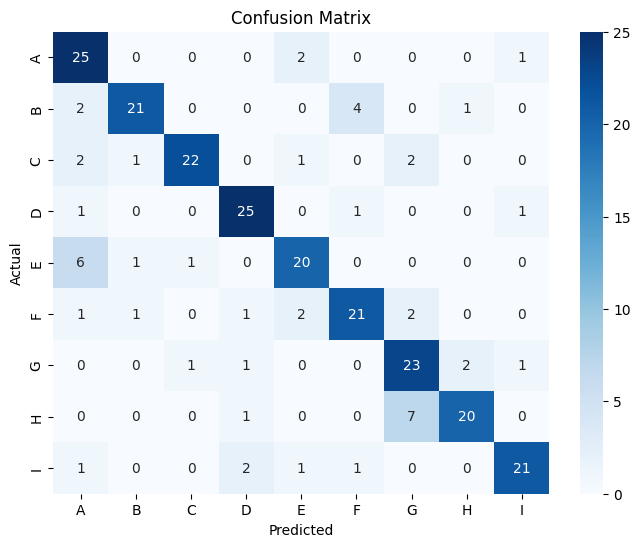

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

class_names = ['A','B','C','D','E','F','G','H','I']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

CUDA is available!  Training on GPU ...
Epoch 1/20 | Iteration: 31 | Train Loss: 0.0291 | Train Accuracy: 0.2451 | Val Accuracy: 0.2375
Epoch 2/20 | Iteration: 62 | Train Loss: 0.0243 | Train Accuracy: 0.5402 | Val Accuracy: 0.5125
Epoch 3/20 | Iteration: 93 | Train Loss: 0.0175 | Train Accuracy: 0.6210 | Val Accuracy: 0.6333
Epoch 4/20 | Iteration: 124 | Train Loss: 0.0158 | Train Accuracy: 0.7039 | Val Accuracy: 0.6958
Epoch 5/20 | Iteration: 155 | Train Loss: 0.0111 | Train Accuracy: 0.7096 | Val Accuracy: 0.7083
Epoch 6/20 | Iteration: 186 | Train Loss: 0.0177 | Train Accuracy: 0.7642 | Val Accuracy: 0.7250
Epoch 7/20 | Iteration: 217 | Train Loss: 0.0167 | Train Accuracy: 0.7915 | Val Accuracy: 0.7542
Epoch 8/20 | Iteration: 248 | Train Loss: 0.0163 | Train Accuracy: 0.8090 | Val Accuracy: 0.7583
Epoch 9/20 | Iteration: 279 | Train Loss: 0.0101 | Train Accuracy: 0.8589 | Val Accuracy: 0.7875
Epoch 10/20 | Iteration: 310 | Train Loss: 0.0046 | Train Accuracy: 0.8811 | Val Accuracy:

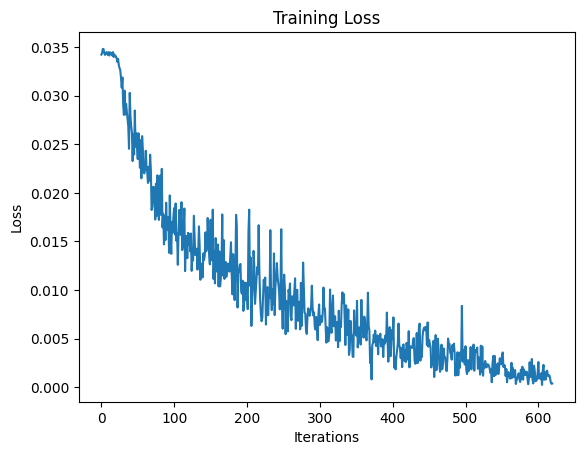

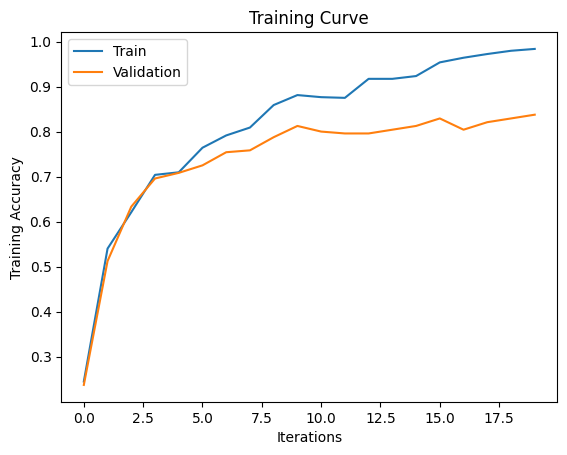

Final Training Accuracy: 0.9835221421215242
Final Validation Accuracy: 0.8375


In [116]:
# TO BE COMPLETED
model3 = CNN3()

if torch.cuda.is_available():
  model3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_tv(model3, train_loader, valid_loader, batch_size=64, num_epochs=20, learning_rate=0.02, tv_weight=0.002)


In [117]:
model = CNN3()
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.02, epoch=19)
state = torch.load(model_path)
model.load_state_dict(state)
model = model.cuda()

In [118]:
correct = 0
total = 0
all_preds = []
all_labels = []
for reviews, labels in torch.utils.data.DataLoader(test_data, batch_size=32, num_workers = 0):

    #############################################
    #To Enable GPU Usage
    if torch.cuda.is_available():
        reviews = reviews.cuda()
        labels = labels.cuda()
    #############################################

    output = model(reviews)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += reviews.shape[0]
    all_preds.extend(pred.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

print("Test accuracy:",correct / total)

Test accuracy: 0.844


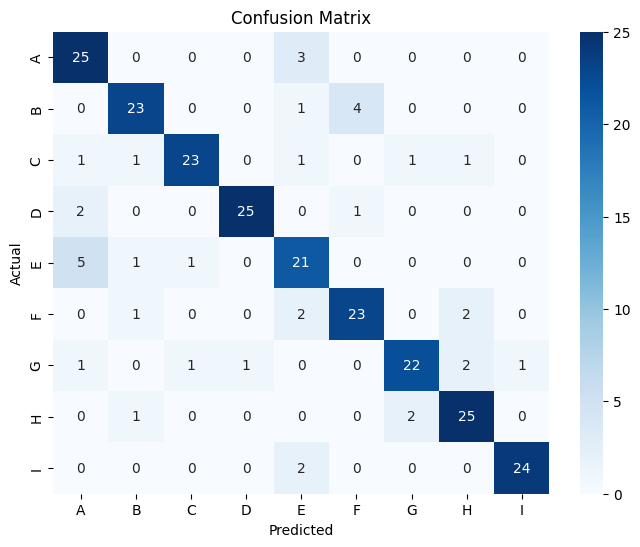

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

class_names = ['A','B','C','D','E','F','G','H','I']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Testing on New data**

Data set from

https://www.kaggle.com/datasets/danrasband/asl-alphabet-test?resource=download

In [120]:
!unzip /content/kaggle.zip

Archive:  /content/kaggle.zip
replace kaggle/A/A0001_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [121]:
# TO BE COMPLETED

transform_kaggle = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
kaggle_dir = "kaggle/"
test_kaggle = datasets.ImageFolder(kaggle_dir, transform=transform_kaggle)


In [122]:
test_kaggle

Dataset ImageFolder
    Number of datapoints: 270
    Root location: kaggle/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [123]:
# TO BE COMPLETED
# TO BE COMPLETED
model = CNN2()
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.02, epoch=19)
state = torch.load(model_path)
model.load_state_dict(state)
model = model.cuda()

In [124]:
correct = 0
total = 0
all_preds = []
all_labels = []
for reviews, labels in torch.utils.data.DataLoader(test_kaggle, batch_size=32, num_workers = 0):

    #############################################
    #To Enable GPU Usage
    if torch.cuda.is_available():
        reviews = reviews.cuda()
        labels = labels.cuda()
    #############################################

    output = model(reviews)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += reviews.shape[0]
    all_preds.extend(pred.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

print("Test accuracy:",correct / total)

Test accuracy: 0.14814814814814814


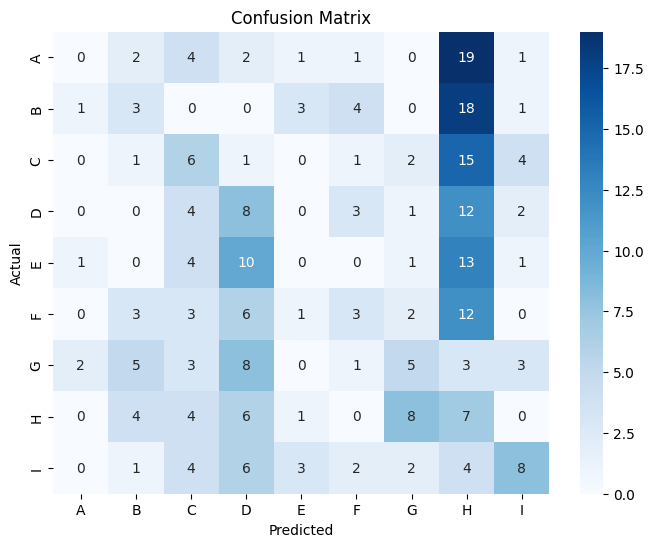

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

class_names = ['A','B','C','D','E','F','G','H','I']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
# TO BE COMPLETED
# TO BE COMPLETED
model = CNN3()
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.02, epoch=19)
state = torch.load(model_path)
model.load_state_dict(state)
model = model.cuda()

In [ ]:
correct = 0
total = 0
all_preds = []
all_labels = []
for reviews, labels in torch.utils.data.DataLoader(test_kaggle, batch_size=32, num_workers = 0):

    #############################################
    #To Enable GPU Usage
    if torch.cuda.is_available():
        reviews = reviews.cuda()
        labels = labels.cuda()
    #############################################

    output = model(reviews)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += reviews.shape[0]
    all_preds.extend(pred.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

print("Test accuracy:",correct / total)

Test accuracy: 0.3925925925925926


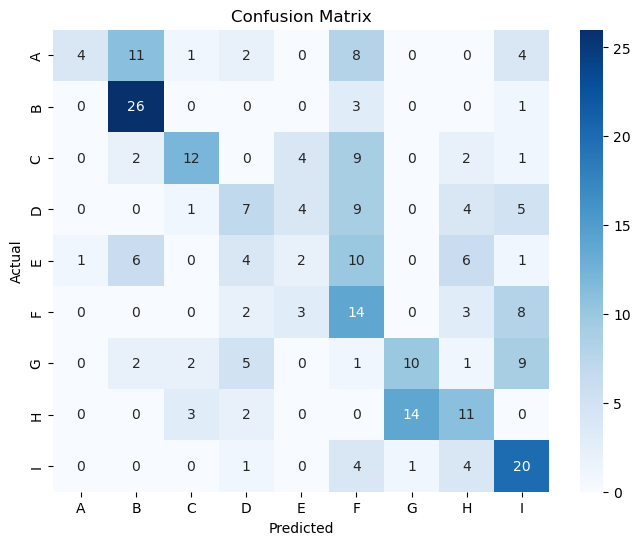

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

class_names = ['A','B','C','D','E','F','G','H','I']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/MIE1517-TA-2025/A2.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus